In [565]:
import pandas as pd
import numpy as np

In [566]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [567]:
raw = pd.read_csv("../examples/COVID19_DE.csv",parse_dates=True,index_col="Meldedatum")

In [568]:
raw.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
Meldedatum,,,,,,,,,,,,
2020-03-30 00:00:00+00:00,3,Niedersachsen,LK Vechta,A60-A79,M,4,0,706589,3460,"04.04.2020, 00:00 Uhr",0,-9
2020-03-31 00:00:00+00:00,3,Niedersachsen,LK Vechta,A60-A79,M,2,0,706590,3460,"04.04.2020, 00:00 Uhr",0,-9
2020-04-01 00:00:00+00:00,3,Niedersachsen,LK Vechta,A60-A79,M,2,0,706591,3460,"04.04.2020, 00:00 Uhr",0,-9
2020-04-02 00:00:00+00:00,3,Niedersachsen,LK Vechta,A60-A79,M,1,0,706592,3460,"04.04.2020, 00:00 Uhr",0,-9
2020-04-03 00:00:00+00:00,3,Niedersachsen,LK Vechta,A60-A79,M,1,0,706593,3460,"04.04.2020, 00:00 Uhr",1,-9


In [569]:
raw.index.month.value_counts()

3    28993
4     5513
2       84
1       13
Name: Meldedatum, dtype: int64

In [570]:
eu_dt = raw.index.strftime("%d.%m.%Y")
eu_dt

Index(['30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020', '03.04.2020',
       '14.03.2020', '16.03.2020', '18.03.2020', '21.03.2020', '23.03.2020',
       ...
       '26.03.2020', '27.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
       '02.04.2020', '17.03.2020', '18.03.2020', '19.03.2020', '23.03.2020'],
      dtype='object', name='Meldedatum', length=34603)

In [571]:
eu_dt

Index(['30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020', '03.04.2020',
       '14.03.2020', '16.03.2020', '18.03.2020', '21.03.2020', '23.03.2020',
       ...
       '26.03.2020', '27.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
       '02.04.2020', '17.03.2020', '18.03.2020', '19.03.2020', '23.03.2020'],
      dtype='object', name='Meldedatum', length=34603)

In [572]:
eu_dt = pd.to_datetime(eu_dt,dayfirst=True)
eu_dt

DatetimeIndex(['2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-03-14', '2020-03-16', '2020-03-18',
               '2020-03-21', '2020-03-23',
               ...
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-23'],
              dtype='datetime64[ns]', name='Meldedatum', length=34603, freq=None)

In [573]:
eu_dt.month.max()

4

In [574]:
raw.index = eu_dt

In [575]:
raw.index.month.value_counts()

3    28993
4     5513
2       84
1       13
Name: Meldedatum, dtype: int64

In [576]:
raw.sort_index(inplace=True)

In [577]:
raw.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
Meldedatum,,,,,,,,,,,,
2020-01-28,9,Bayern,LK Landsberg a.Lech,A15-A34,M,1,0,724424,9181,"04.04.2020, 00:00 Uhr",0,-9
2020-01-28,9,Bayern,LK Starnberg,A35-A59,M,1,0,725351,9188,"04.04.2020, 00:00 Uhr",0,-9
2020-01-29,9,Bayern,LK Fürstenfeldbruck,A15-A34,M,1,0,724198,9179,"04.04.2020, 00:00 Uhr",0,-9
2020-01-29,9,Bayern,SK München,A15-A34,W,1,0,722982,9162,"04.04.2020, 00:00 Uhr",0,-9
2020-01-30,8,Baden-Württemberg,SK Mannheim,A15-A34,W,1,0,719651,8222,"04.04.2020, 00:00 Uhr",0,-9


In [578]:
tagesraten = raw.groupby(["Meldedatum"])[["AnzahlFall","NeuerFall","AnzahlTodesfall"]].sum()
tagesraten.head()

,AnzahlFall,NeuerFall,AnzahlTodesfall
Meldedatum,,,
2020-01-28,2,0,0
2020-01-29,2,0,0
2020-01-30,2,0,0
2020-01-31,7,0,0
2020-02-02,1,1,0


In [579]:
norm_daily = tagesraten.apply(lambda x: (x-x.min()) / (x.max()-x.min()))
norm_daily.head()

,AnzahlFall,NeuerFall,AnzahlTodesfall
Meldedatum,,,
2020-01-28,0.000166,0.000810,0.0
2020-01-29,0.000166,0.000810,0.0
2020-01-30,0.000166,0.000810,0.0
2020-01-31,0.000998,0.000810,0.0
2020-02-02,0.000000,0.001621,0.0


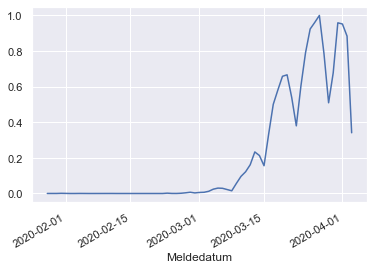

In [580]:
norm_daily["AnzahlFall"].plot()

In [581]:
norm_daily.describe()

,AnzahlFall,NeuerFall,AnzahlTodesfall
count,53.000000,53.000000,53.000000
mean,0.268899,0.042216,0.183447
std,0.344950,0.176047,0.268800
min,0.000000,0.000000,0.000000
25%,0.000998,0.000810,0.000000
50%,0.030273,0.001621,0.025210
75%,0.539421,0.004862,0.327731
max,1.000000,1.000000,1.000000


#### Anzahl der Fälle pro BL & Geschlecht

In [582]:
raw["Geschlecht"].unique()

array(['M', 'W', 'unbekannt'], dtype=object)

In [583]:
raw[raw.Geschlecht == "unbekannt"] = np.nan

In [584]:
raw["Geschlecht"].unique()

array(['M', 'W', nan], dtype=object)

In [585]:
raw["Geschlecht"].value_counts()

M    17673
W    16673
Name: Geschlecht, dtype: int64

In [586]:
raw["Geschlecht"].dropna(axis="rows",inplace=True)

In [587]:
bl_gesch = raw.groupby(["Bundesland","Geschlecht"])[["AnzahlFall"]].sum()
bl_gesch

AnzahlFall
Bundesland             Geschlecht            
Baden-Württemberg      M               8507.0
                       W               8456.0
Bayern                 M              10768.0
                       W              10988.0
Berlin                 M               1786.0
                       W               1673.0
Brandenburg            M                597.0
                       W                614.0
Bremen                 M                190.0
                       W                163.0
Hamburg                M               1423.0
                       W               1262.0
Hessen                 M               2251.0
                       W               2014.0
Mecklenburg-Vorpommern M                276.0
                       W                223.0
Niedersachsen          M               2773.0
                       W               2770.0
Nordrhein-Westfalen    M               9200.0
                       W               8665.0
Rheinland-Pfalz        M               1802.0
                       W               1678.0
Saarland               M                595.0
                       W                651.0
Sachsen                M               1259.0
                       W               1329.0
Sachsen-Anhalt         M                437.0
                       W                459.0
Schleswig-Holstein     M                768.0
                       W                785.0
Thüringen              M                538.0
                       W                533.0

In [588]:
#vals erstellen
vals = bl_gesch.unstack().sort_values(by=("AnzahlFall","M"),ascending=False)["AnzahlFall"].values
vals[:5]

array([[10768., 10988.],
       [ 9200.,  8665.],
       [ 8507.,  8456.],
       [ 2773.,  2770.],
       [ 2251.,  2014.]])

In [589]:
#dic erstellen
dic = []
for i in range(len(bl_gesch.unstack().index)):
    dic.append((bl_gesch.unstack().sort_values(by=("AnzahlFall","M"),ascending=False).index[i], (vals[i][0]+vals[i][1]) / 2))
    
dic[:5]  

[('Bayern', 10878.0),
 ('Nordrhein-Westfalen', 8932.5),
 ('Baden-Württemberg', 8481.5),
 ('Niedersachsen', 2771.5),
 ('Hessen', 2132.5)]

<IPython.core.display.Javascript object>


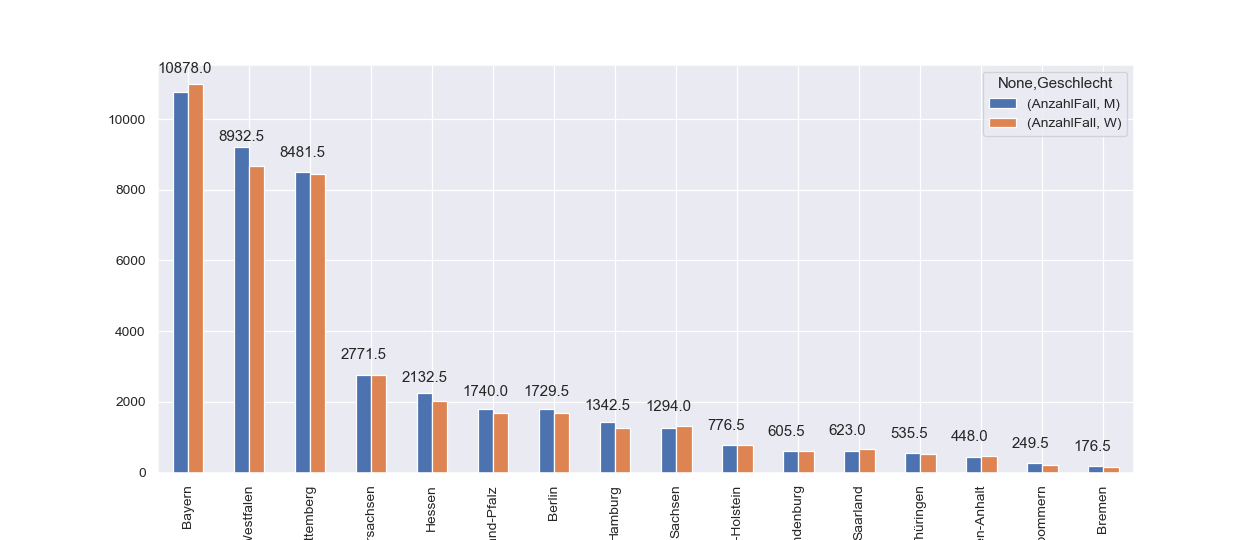

In [622]:
%matplotlib notebook
fig,ax = plt.subplots()

bl_gesch.unstack().sort_values(by=("AnzahlFall","M"),ascending=False).plot.bar(ax=ax,figsize=(14,6))

In [591]:
bund = {
    "Baden-Württemberg" : 2,
    "Bayern":0,
    "Berlin":6,
    "Brandenburg":10,
    "Bremen":15,
    "Hamburg":7,
    "Hessen":4,
    "Mecklenburg-Vorpommern":14,
    "Niedersachsen":3,
    "Nordrhein-Westfalen":1,
    "Rheinland-Pfalz":5,
    "Saarland":11,
    "Sachsen":8,
    "Sachsen-Anhalt":13,
    "Schleswig-Holstein":9,
    "Thüringen":12
}

In [623]:
for bl,wert in dic:
    ax.annotate(wert,xy=(bund[bl],wert),xytext=(bund[bl]-0.5,wert+750),verticalalignment="top")

In [593]:
ax.set_ylabel("Fälle")
ax.set_title("Anzahl der Fälle pro Bundesland beider Geschlechter")

Text(0.5, 1.0, 'Anzahl der Fälle pro Bundesland beider Geschlechter')

#### Altersgruppen

In [594]:
raw["Altersgruppe"].unique()

array(['A15-A34', 'A35-A59', 'A80+', 'A00-A04', 'A60-A79', 'A05-A14',
       'unbekannt', nan], dtype=object)

In [595]:
raw["Altersgruppe"] = raw["Altersgruppe"].replace("unbekannt",np.nan)
raw["Altersgruppe"].unique()

array(['A15-A34', 'A35-A59', 'A80+', 'A00-A04', 'A60-A79', 'A05-A14', nan],
      dtype=object)

#### Checking with global Data

In [596]:
world_raw = pd.read_csv("../examples/Covid_world.csv",parse_dates=True,index_col="dateRep",dayfirst=True)[["countriesAndTerritories","cases","deaths"]]

In [597]:
world_raw.index.month.value_counts()

3     3815
1     2077
2     1943
4     1815
12      67
Name: dateRep, dtype: int64

In [598]:
world_raw.sort_index(inplace=True)

In [599]:
world_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9717 entries, 2019-12-31 to 2020-04-09
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   countriesAndTerritories  9717 non-null   object
 1   cases                    9717 non-null   int64 
 2   deaths                   9717 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 265.7+ KB


In [600]:
world_raw.rename(columns={"countriesAndTerritories":"Countries","cases":"Cases","deaths":"Deaths"},inplace=True)

In [601]:
w_group = world_raw.groupby(["Countries","dateRep"]).sum()
w_group

Cases  Deaths
Countries   dateRep                  
Afghanistan 2019-12-31      0       0
            2020-01-01      0       0
            2020-01-02      0       0
            2020-01-03      0       0
            2020-01-04      0       0
...                       ...     ...
Zimbabwe    2020-04-05      0       0
            2020-04-06      0       0
            2020-04-07      0       0
            2020-04-08      1       0
            2020-04-09      1       1

[9717 rows x 2 columns]

In [602]:
w_group.loc["Germany",:].sum()

Cases     108202
Deaths      2107
dtype: int64

In [603]:
w_group.loc["Sweden",:].sum()

Cases     8419
Deaths     687
dtype: int64

<IPython.core.display.Javascript object>


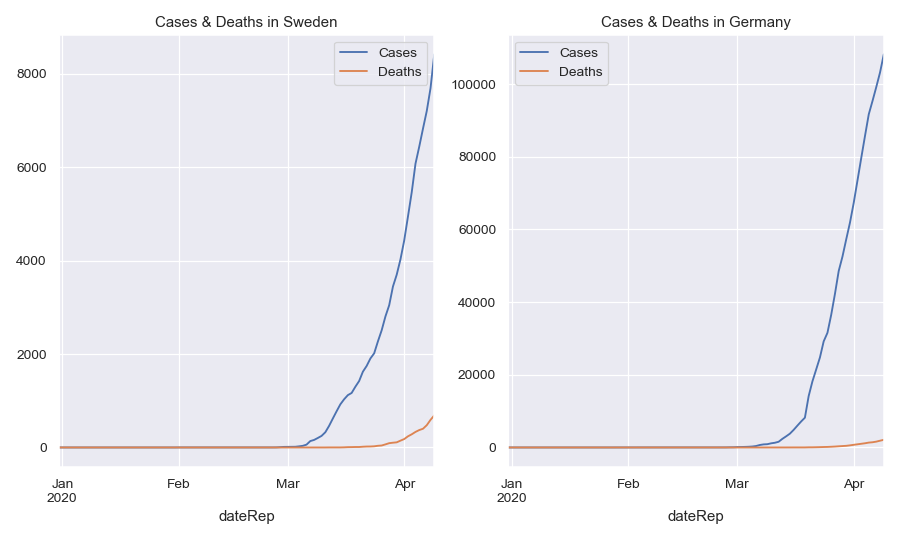

In [624]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
w_group.loc["Sweden",:].cumsum().plot(ax=axes[0],title="Cases & Deaths in Sweden")

In [625]:
w_group.loc["Germany"].cumsum().plot(ax=axes[1],title="Cases & Deaths in Germany")
plt.tight_layout()

In [606]:
w_group.loc["Sweden"]["2020-03":"2020-04"].tail()

,Cases,Deaths
dateRep,,
2020-04-05,365,40
2020-04-06,387,28
2020-04-07,376,76
2020-04-08,487,114
2020-04-09,726,96


In [607]:
w_group.unstack(0)["Cases"]["Sweden"]

dateRep
2019-12-31      0.0
2020-01-01      0.0
2020-01-02      0.0
2020-01-03      0.0
2020-01-04      0.0
              ...  
2020-04-05    365.0
2020-04-06    387.0
2020-04-07    376.0
2020-04-08    487.0
2020-04-09    726.0
Name: Sweden, Length: 101, dtype: float64

In [608]:
w_unstacked = w_group.unstack(0)

In [609]:
w_swapped = w_unstacked.swaplevel(axis="columns")
w_swapped.head()

Countries,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
,Cases,Cases,Cases,Cases,Cases,Cases,Cases,Cases,Cases,Cases,...,Deaths,Deaths,Deaths,Deaths,Deaths,Deaths,Deaths,Deaths,Deaths,Deaths
dateRep,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-02,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN


<IPython.core.display.Javascript object>


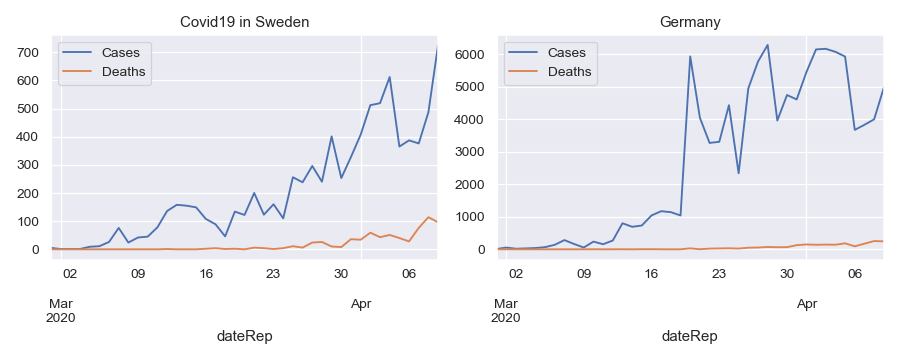

In [626]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
w_swapped.iloc[60:122]["Sweden"].plot(ax=axes[0],title="Covid19 in Sweden")

In [627]:
w_swapped.iloc[60:122]["Germany"].plot(ax=axes[1],title="Germany")
plt.tight_layout()

In [612]:
w_swapped.iloc[100]["Germany"]["Deaths"].sum()

246.0

In [613]:
w_swapped.iloc[100]["Sweden"]["Deaths"].sum()

96.0

###### Dataframe for only Sweden and Germany

In [614]:
de_swe = w_swapped[["Sweden","Germany"]]
de_swe.tail()

Countries  Sweden        Germany       
            Cases Deaths   Cases Deaths
dateRep                                
2020-04-05  365.0   40.0  5936.0  184.0
2020-04-06  387.0   28.0  3677.0   92.0
2020-04-07  376.0   76.0  3834.0  173.0
2020-04-08  487.0  114.0  4003.0  254.0
2020-04-09  726.0   96.0  4974.0  246.0

###### Adding Percentages relative to Population

In [615]:
pop_swe = 10230000
pop_de = 83000000

In [616]:
de_swe["Sweden","Case_pct"] = de_swe["Sweden","Cases"].apply(lambda x: x/pop_swe)

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [617]:
de_swe["Germany","Case_pct"] = de_swe["Sweden","Cases"].apply(lambda x: x/pop_de)

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [618]:
de_swe.sort_index(axis=1)

Countries    Germany                   Sweden              
            Case_pct   Cases Deaths  Case_pct  Cases Deaths
dateRep                                                    
2019-12-31  0.000000     0.0    0.0  0.000000    0.0    0.0
2020-01-01  0.000000     0.0    0.0  0.000000    0.0    0.0
2020-01-02  0.000000     0.0    0.0  0.000000    0.0    0.0
2020-01-03  0.000000     0.0    0.0  0.000000    0.0    0.0
2020-01-04  0.000000     0.0    0.0  0.000000    0.0    0.0
...              ...     ...    ...       ...    ...    ...
2020-04-05  0.000004  5936.0  184.0  0.000036  365.0   40.0
2020-04-06  0.000005  3677.0   92.0  0.000038  387.0   28.0
2020-04-07  0.000005  3834.0  173.0  0.000037  376.0   76.0
2020-04-08  0.000006  4003.0  254.0  0.000048  487.0  114.0
2020-04-09  0.000009  4974.0  246.0  0.000071  726.0   96.0

[101 rows x 6 columns]

<IPython.core.display.Javascript object>


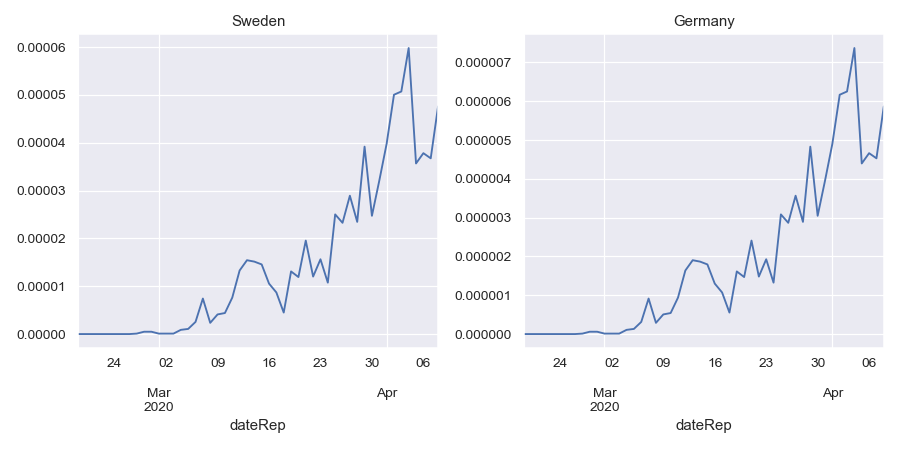

In [619]:
%matplotlib notebook
fig,axes = plt.subplots(1,2,figsize=(10,5))

de_swe.iloc[50:100]["Sweden","Case_pct"].plot(ax=axes[0],title="Sweden")
de_swe.iloc[50:100]["Germany","Case_pct"].plot(ax=axes[1],title="Germany")
plt.tight_layout()

##### Most affected worldwide

In [620]:
world_nr = w_group.groupby("Countries")[["Cases","Deaths"]].sum()
world_nr.head()

,Cases,Deaths
Countries,,
Afghanistan,423,14
Albania,400,22
Algeria,1572,205
Andorra,564,23
Angola,19,2


<IPython.core.display.Javascript object>


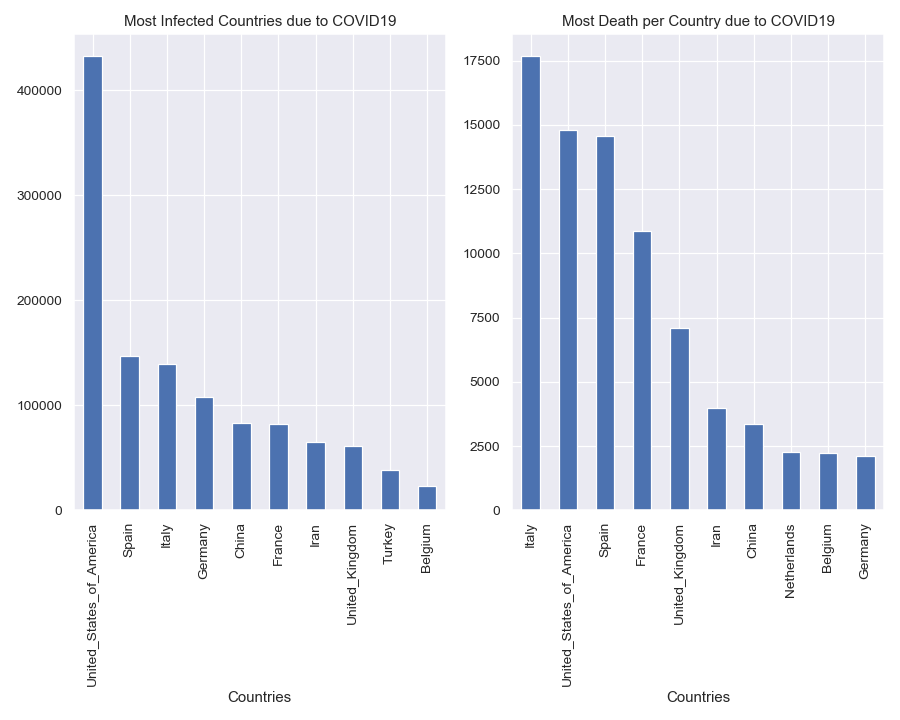

In [621]:
fig,axes = plt.subplots(1,2,figsize=(10,8))

world_nr["Cases"].sort_values(ascending=False)[:10].plot.bar(ax=axes[0],title="Most Infected Countries due to COVID19")
world_nr["Deaths"].sort_values(ascending=False)[:10].plot.bar(ax=axes[1],title="Most Death per Country due to COVID19")

plt.tight_layout()